<a href="https://colab.research.google.com/github/AlanCordeiro35/An-lise-de-dados-com-python-e-Pandas/blob/main/An%C3%A1lise_de_Dados_por_Estados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Análise de Dados por Estados**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importando a biblioteca pandas
import pandas as pd

In [ ]:
#Leitura dos Arquivos
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")


In [ ]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Exibir as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1.0
1,Aracaju,2018-01-01,14.21,1522,6.0
2,Aracaju,2018-01-01,71.55,1520,1.0
3,Aracaju,2018-01-01,NaN,1521,NaN
4,Aracaju,2018-01-01,24.51,1522,8.0


In [ ]:
#Exibir as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
137,Recife,2019-03-02,51.99,983,3.0
138,Recife,2019-03-02,150.38,983,6.0
139,Recife,2019-03-02,141.16,980,7.0
140,Recife,2019-03-02,166.89,983,5.0
141,Recife,2019-03-02,182.75,983,8.0


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
73,Salvador,2019-01-01,8.39,1037,1.0
117,Fortaleza,2019-03-02,15.42,983,8.0
62,Fortaleza,2019-01-01,106.21,1005,6.0
95,Recife,2019-01-01,40.03,982,3.0
57,Natal,2019-02-24,425.00,854,4.0


In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde             float64
dtype: object

In [ ]:
#Alterando o tipo de cada coluna lojaID
df["LojaID"] = df["LojaID"].astype("object")  

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde             float64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1.0
1,Aracaju,2018-01-01,14.21,1522,6.0
2,Aracaju,2018-01-01,71.55,1520,1.0
3,Aracaju,2018-01-01,NaN,1521,NaN
4,Aracaju,2018-01-01,24.51,1522,8.0


In [ ]:
#Consultando linhas com valores faltante
df.isnull().sum()

Cidade    0
Data      0
Vendas    5
LojaID    0
Qtde      5
dtype: int64

In [ ]:
#Maneira de substituir valores nulos pela média do calculo
#Inplace é usado para gravar a alteração na memoria
df["Vendas"].fillna(df["Vendas"].mean(), inplace= True)

In [ ]:
#Consultando linhas com valores faltante
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      5
dtype: int64

In [ ]:
#Substituindo os valores nulos por zero
#Inplace é usado para gravar a alteração na memoria
df["Qtde"].fillna(0, inplace=True)

In [ ]:
#Consultando linhas com valores faltante
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Apagando as linhas com valores nulos com base em apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Remover linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all",inplace=True)

In [ ]:
#Criando a coluna de receita
#Receita coluna nova e multiplica vendas por Qtde
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.000000,1520,1.0,142.00
1,Aracaju,2018-01-01,14.210000,1522,6.0,85.26
2,Aracaju,2018-01-01,71.550000,1520,1.0,71.55
3,Aracaju,2018-01-01,123.279078,1521,0.0,0.00
4,Aracaju,2018-01-01,24.510000,1522,8.0,196.08


In [ ]:
df["Receita"].min()

0.0

In [ ]:
df["Receita"].max()

3544.0

In [ ]:
#Retornar as maiores quantidade "Receita"
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4.0,3544.0
51,Natal,2018-01-21,859.0,852,4.0,3436.0
55,Natal,2019-01-08,859.0,854,4.0,3436.0


In [ ]:
#Retornar as menores quantidade "Receita" 
df.nsmallest(6, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
3,Aracaju,2018-01-01,123.279078,1521,0.0,0.00
27,Aracaju,2018-01-01,123.279078,1523,0.0,0.00
79,Aracaju,2018-01-01,123.279078,1521,0.0,0.00
112,Aracaju,2018-01-01,123.279078,1522,0.0,0.00
118,Aracaju,2018-01-01,123.279078,1522,0.0,0.00
65,Recife,2019-01-01,4.010000,981,1.0,4.01


In [ ]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48651.76
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4.0,3544.0
51,Natal,2018-01-21,859.0,852,4.0,3436.0
55,Natal,2019-01-08,859.0,854,4.0,3436.0
30,Natal,2018-10-02,856.0,853,4.0,3424.0
41,Natal,2018-05-20,835.0,852,4.0,3340.0
10,Natal,2018-10-27,828.0,852,4.0,3312.0
38,Natal,2018-02-25,828.0,852,4.0,3312.0
69,Natal,2019-03-24,817.0,852,4.0,3268.0
62,Natal,2018-02-10,793.0,854,4.0,3172.0
52,Natal,2018-04-27,778.0,854,4.0,3112.0


# **Trabalhando com Datas**



In [ ]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
#Verificando o tipo de cada dado
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde       float64
Receita    float64
dtype: object

In [ ]:
#Transformando coluna data no tipo data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
#Verificando o tipo de cada dado
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde              float64
Receita           float64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118080.04
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma coluna como ano
df["Ano_Vendas"] = df["Data"].dt.year

In [ ]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas
0,Aracaju,2018-01-01,142.000000,1520,1.0,142.00,2018
1,Aracaju,2018-01-01,14.210000,1522,6.0,85.26,2018
2,Aracaju,2018-01-01,71.550000,1520,1.0,71.55,2018
3,Aracaju,2018-01-01,123.279078,1521,0.0,0.00,2018
4,Aracaju,2018-01-01,24.510000,1522,8.0,196.08,2018
...,...,...,...,...,...,...,...
137,Recife,2019-03-02,51.990000,983,3.0,155.97,2019
138,Recife,2019-03-02,150.380000,983,6.0,902.28,2019
139,Recife,2019-03-02,141.160000,980,7.0,988.12,2019
140,Recife,2019-03-02,166.890000,983,5.0,834.45,2019


In [ ]:
#Extraindo mês e dia da data 
df["mes_vendas"],df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_vendas,dia_venda
122,Salvador,2019-03-02,13.27,1037,1.0,13.27,2019,3,2
17,Natal,2018-02-18,276.00,854,3.0,828.00,2018,2,18
184,Salvador,2019-01-02,167.16,1037,1.0,167.16,2019,1,2
182,Salvador,2019-01-02,6.60,1037,2.0,13.20,2019,1,2
41,Aracaju,2018-01-01,229.64,1520,8.0,1837.12,2018,1,1


In [ ]:
#Retornar a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calcular a diferença de didas
df["diferença_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_vendas,dia_venda,diferença_dias
106,Recife,2019-01-01,30.46,982,3.0,91.38,2019,1,1,365 days
54,Fortaleza,2019-01-01,16.73,1002,5.0,83.65,2019,1,1,365 days
59,Aracaju,2018-01-01,15.07,1523,7.0,105.49,2018,1,1,0 days
138,Salvador,2019-03-02,212.03,1037,3.0,636.09,2019,3,2,425 days
226,Salvador,2019-01-02,38.32,1035,2.0,76.64,2019,1,2,366 days


In [ ]:
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_vendas,dia_venda,diferença_dias,trimestre_venda
47,Natal,2018-03-13,521.00,854,3.0,1563.00,2018,3,13,71 days,1
24,Fortaleza,2019-01-01,35.38,1005,4.0,141.52,2019,1,1,365 days,1
38,Aracaju,2018-01-01,142.46,1520,1.0,142.46,2018,1,1,0 days,1
41,Aracaju,2018-01-01,229.64,1520,8.0,1837.12,2018,1,1,0 days,1
71,Recife,2019-01-01,138.69,983,3.0,416.07,2019,1,1,365 days,1


In [ ]:
#Filtrando as vendas 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_vendas,dia_venda,diferença_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4.0,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6.0,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6.0,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3.0,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1.0,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Recife,2019-03-02,51.99,983,3.0,155.97,2019,3,2,425 days,1
138,Recife,2019-03-02,150.38,983,6.0,902.28,2019,3,2,425 days,1
139,Recife,2019-03-02,141.16,980,7.0,988.12,2019,3,2,425 days,1
140,Recife,2019-03-02,166.89,983,5.0,834.45,2019,3,2,425 days,1


# **Visualização de Dados**

In [ ]:
#Contar quantas vezes o valor se repetiu na base de dados
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

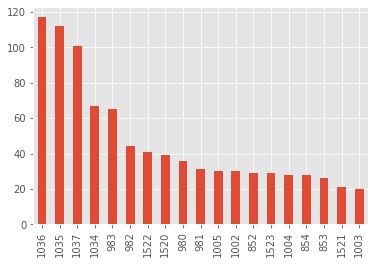

In [ ]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

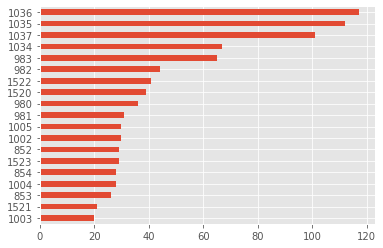

In [ ]:
#Grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

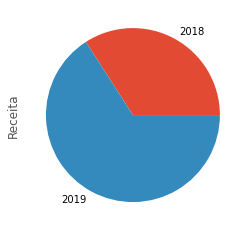

In [ ]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

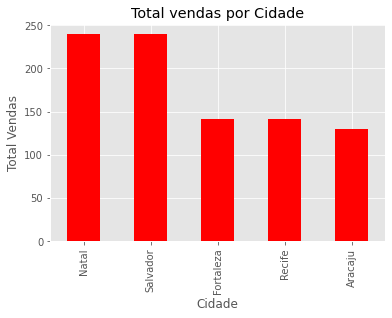

In [ ]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color = "red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [ ]:
#Tipo de alteração do fundo gráfico
plt.style.use("ggplot")

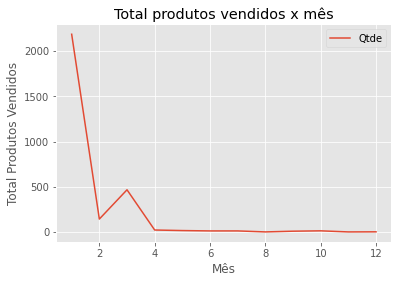

In [ ]:
#Criação do gráfico
df.groupby(df["mes_vendas"])["Qtde"].sum().plot(title = "Total produtos vendidos x mês");
plt.xlabel("Mês");
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [ ]:
df["Qtde"] = df["Qtde"].astype("int64")

In [ ]:
df.groupby(df["mes_vendas"])["Qtde"].sum()

mes_vendas
1     2184
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
df_2019 = df[df["Ano_Vendas"] == 2019]

In [ ]:
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum()

mes_vendas
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

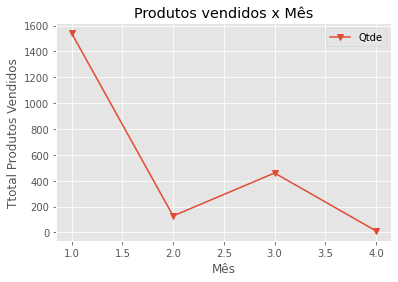

In [ ]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum().plot(title = "Produtos vendidos x Mês", marker = "v");
plt.xlabel("Mês");
plt.ylabel("Ttotal Produtos Vendidos");
plt.legend();

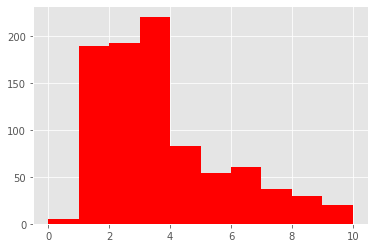

In [ ]:
#Histograma
plt.hist(df["Qtde"], color = "red");

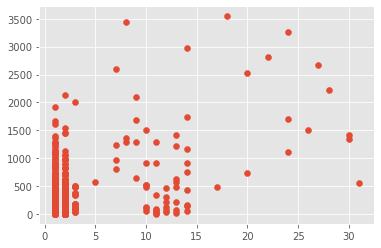

In [ ]:
#Gráfico de disperção
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

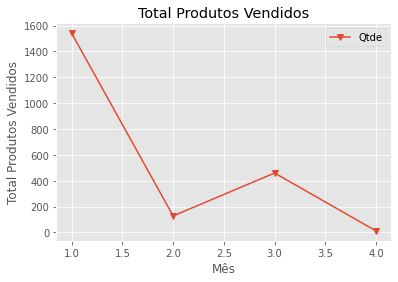

In [ ]:
#Salvando em png
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum().plot(title = "Total Produtos Vendidos",marker = "v");
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("Grafico QTDE X MES.png")

In [ ]:
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_vendas,dia_venda,diferença_dias,trimestre_venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1
138,Recife,2019-03-02,150.38,983,6,902.28,2019,3,2,425 days,1
139,Recife,2019-03-02,141.16,980,7,988.12,2019,3,2,425 days,1
140,Recife,2019-03-02,166.89,983,5,834.45,2019,3,2,425 days,1


<div class="markdown-google-sans">
  <h1>Conheça o Colab</h1>
</div>

Se você já conhece bem o Colab, confira este vídeo para saber mais sobre as tabelas interativas, a visualização do histórico de código executado e o Palette de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  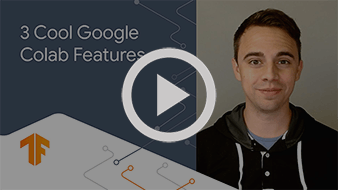
  </a>
</center>

<div class="markdown-google-sans">
  <h1>O que é o Colab?</h1>
</div>

O Colab, ou "Colaboratory", permite escrever e executar Python no navegador e conta com o seguinte: 
- Nenhuma configuração necessária
- Acesso a GPUs sem custo financeiro
- Compartilhamento fácil

Você pode ser um <strong>estudante</strong>, um <strong>cientista de dados</strong> ou um <strong>pesquisador de IA</strong>, o Colab pode facilitar seu trabalho. Assista ao vídeo <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introdução ao Colab</a> para saber mais ou simplesmente comece a usá-lo abaixo!

<div class="markdown-google-sans">

## <strong>Vamos começar</strong>
</div>

O documento que você está lendo não é uma página da Web estática, mas sim um ambiente interativo chamado <strong>notebook Colab</strong> que permite escrever e executar código.

Por exemplo, aqui está uma <strong>célula de código</strong> com um breve script Python que calcula um valor, armazena-o em uma variável e imprime o resultado:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Para executar o código na célula acima, clique nela e depois pressione o botão Play à esquerda do código ou use o atalho do teclado "Command/Ctrl+Enter". Para editar o código, basta clicar na célula e começar a editar.

As variáveis definidas em uma célula podem ser usadas mais tarde em outras células:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Os notebooks do Colab permitem combinar <strong>código executável</strong> e <strong>rich text</strong> em um só documento, além de <strong>imagens</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> e muito mais. Quando você cria seus próprios notebooks do Colab, eles são armazenados na sua conta do Google Drive. É possível compartilhar os notebooks do Colab facilmente com colegas de trabalho ou amigos e permitir que eles façam comentários ou até editem o documento. Para saber mais, consulte a <a href="/notebooks/basic_features_overview.ipynb">Visão Geral do Colab</a>. Para criar um novo notebook do Colab, use o menu Arquivo acima ou acesse o seguinte: <a href="http://colab.research.google.com#create=true">criar um novo notebook do Colab</a>.

Os notebooks do Colab são notebooks do Jupyter hospedados no Colab. Para saber mais sobre o projeto Jupyter, acesse <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ciência de dados
</div>

Com o Colab, você pode aproveitar todo o potencial das conhecidas bibliotecas Python para analisar e ver dados. A célula de códigos abaixo usa <strong>numpy</strong> para gerar dados aleatórios e <strong>matplotlib</strong> para visualizá-los. Para editar o código, basta clicar na célula e começar a editar.

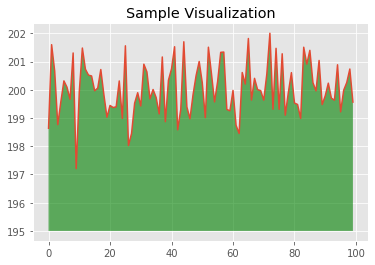

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

É possível importar para os notebooks do Colab os dados da sua conta do Google Drive, como planilhas. Também é possível importar do GitHub e de muitas outras fontes. Para saber mais sobre como importar dados e como o Colab pode ser usado para a ciência de dados, consulte o link abaixo em <a href="#working-with-data">Como trabalhar com dados</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Com o Colab, é possível importar um conjunto de dados de imagem, treinar um classificador de imagens dentro dele e avaliar o modelo, tudo com apenas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">algumas linhas de código</a>. Os notebooks do Colab executam código dos servidores em nuvem do Google. Isso significa que você pode tirar proveito da potência de hardware do Google, como <a href="#using-accelerated-hardware">GPUs e TPUs</a>, independentemente da potência da sua máquina. Você só precisa de um navegador.

O Colab é usado amplamente pela comunidade de machine learning, para aplicações como:
- Começar a usar o TensorFlow
- Desenvolvimento e treinamento de redes neurais
- Experimentos com TPUs
- Divulgação de pesquisas em IA
- Criação de tutoriais

Para ver notebooks do Colab que demonstram aplicações de machine learning, consulte os <a href="#machine-learning-examples">exemplos de machine learning</a> abaixo.

<div class="markdown-google-sans">

## Mais recursos

### Como trabalhar com Notebooks no Colab

</div>

- [Visão geral do Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guia sobre Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependências](/notebooks/snippets/importing_libraries.ipynb)
- [Salvar e carregar notebooks no GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulários interativos](/notebooks/forms.ipynb)
- [Widgets interativos](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Como trabalhar com dados
</div>

- [Carregar dados: Drive, Planilhas e Google Cloud Storage](/notebooks/io.ipynb) 
- [Gráficos: visualizar dados](/notebooks/charts.ipynb)
- [Começar a usar o BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Curso intensivo de machine learning

<div>

Estes são alguns notebooks do curso on-line do Google sobre machine learning. Acesse o <a href="https://developers.google.com/machine-learning/crash-course/">site do curso completo</a> para saber mais.
- [Introdução ao Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regressão linear com tf.keras e uso de dados sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Usar hardware acelerado
</div>

- [TensorFlow com GPUs](/notebooks/gpu.ipynb)
- [TensorFlow com TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Exemplos em destaque

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: use o kit de ferramentas para IA conversacional do Nvidia NeMo para trocar uma voz em um fragmento de áudio por uma gerada por computador.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Treinar novamente um classificador de imagens</a>: crie um modelo do Keras com base em um classificador de imagens pré-treinado para distinguir flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Classificação de texto</a>: classifique avaliações de filmes do IMDB como <em>positivas</em> ou <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferência de estilo</a>: use o aprendizado profundo para transferir o estilo entre imagens.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Perguntas e respostas sobre o codificador de frases universais multilíngue</a>: use um modelo de machine learning para responder a perguntas do conjunto de dados SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolação de vídeo</a>: preveja o que aconteceu em um vídeo entre o primeiro e o último frames.
